# Sentiment_Analys_Twitter_Tweets

# 2023 Turkey–Syria earthquake 
## Türkiye - Suriye üzerindeki  6 Şubat Deprem tweet sentimen analizi ,classification modeli uygulamak ve en son en çok kullanılanların WordCloud unu çıkarmak

In [4]:
#pip install twython

In [32]:
#!pip install textblob

In [121]:
#!pip install langdetect

In [136]:
#nltk.download('wordnet')

In [139]:
#nltk.download('omw-1.4')

In [79]:
import nltk

In [81]:
#nltk.download('punkt')

In [116]:
#nltk.download('stopwords')

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
##Twitter Paket i , JSON Formatında Data alınabilmektedir.
from twython import Twython

CONSUMER_KEY = "XXXXXXXX" ##Twitter CustomerKey Girilmeli
CONSUMER_SECRET = "XXXXXX" ##Twitter Tokenid Girilmeli
twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

In [211]:
import pandas as pd
import numpy as np

In [4]:
#dir(pd)

In [50]:
sonuc=twitter.search(q='turkey earthquake',lang='en',count=1000)

In [51]:
items=sonuc['statuses']

In [52]:
tdf=pd.DataFrame(items)

In [53]:
tdf.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,Sat Mar 25 21:23:44 +0000 2023,1639739870552682500,1639739870552682500,RT @Simancre: This is #HAARP in action over #T...,False,"{'hashtags': [{'text': 'HAARP', 'indices': [22...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,136,0,False,False,en,NaN,NaN,NaN,NaN
1,Sat Mar 25 21:23:08 +0000 2023,1639739718114893826,1639739718114893826,RT @AJEnglish: Thousands of earthquake survivo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,338,0,False,False,en,"{'media': [{'id': 1639531874446876672, 'id_str...",False,NaN,NaN
2,Sat Mar 25 21:22:41 +0000 2023,1639739603480637440,1639739603480637440,Video on Earthquake.Concept &amp; Edit by me.I...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,0,0,False,False,en,NaN,False,NaN,NaN
3,Sat Mar 25 21:22:35 +0000 2023,1639739581116346369,1639739581116346369,#Earthquake (#deprem) M2.0 strikes 11 km SE of...,False,"{'hashtags': [{'text': 'Earthquake', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.emsc-csem.org/"" rel=""nofol...",NaN,None,...,False,0,1,False,False,en,NaN,False,NaN,NaN
4,Sat Mar 25 21:22:32 +0000 2023,1639739566046232580,1639739566046232580,RT @Simancre: This is #HAARP in action over #T...,False,"{'hashtags': [{'text': 'HAARP', 'indices': [22...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,136,0,False,False,en,NaN,NaN,NaN,NaN


In [54]:
user=pd.DataFrame(d['user'] for d in sonuc['statuses'])

In [55]:
user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,1103386127766077442,1103386127766077442,John,john91414884,,“Alone we can do so little; together we can do...,None,{'description': {'urls': []}},False,66,...,True,False,True,False,None,None,None,none,[],NaN
1,1533384407045873667,1533384407045873667,Tauqeer Fatima Naqvi,TauqeerN1,"Toronto, Ontario",Tea enthusiast ☕️| love travel | seeking Knowl...,None,{'description': {'urls': []}},False,201,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/15333844...
2,812292603274215424,812292603274215424,Mr Sharma 🇮🇳 🌏 Global Peace,Braahmos,Here and Now,"Paid Promotion, Advertise Making, Direction, F...",None,{'description': {'urls': []}},False,620,...,True,False,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/81229260...
3,2449645080,2449645080,AllQuakes - EMSC,EMSC,"Bruyères-Le-Chatel, France",EMSC provides rapid earthquake info. This acco...,https://t.co/goORnDGkOk,{'url': {'urls': [{'url': 'https://t.co/goORnD...,False,48513,...,True,False,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/24496450...
4,1445519057818558470,1445519057818558470,Manuela Ferreira,Manuela28394065,"Porto, Portugal",🇵🇹,None,{'description': {'urls': []}},False,32,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/14455190...


In [102]:
df=tdf.merge(user,left_index=True,right_index=True)

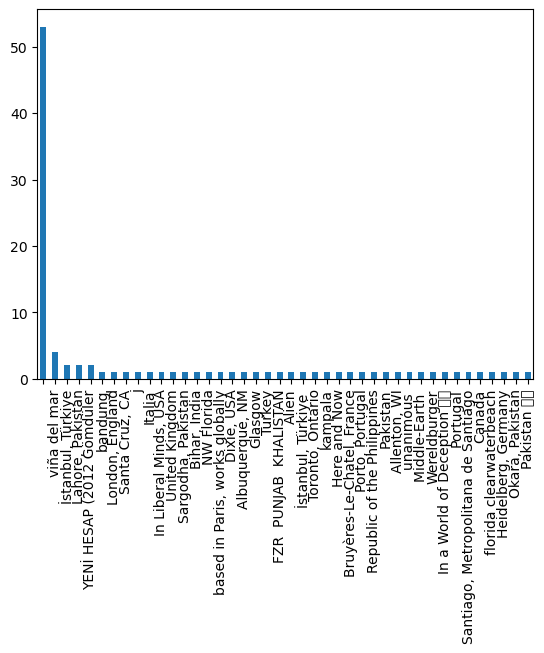

In [103]:
df.location.value_counts().plot(kind='bar');

In [108]:
df_msg_text=df["text"]
df_msg_text=pd.DataFrame(df_msg_text)

In [109]:
df_msg_text.head()

,text
0,RT @Simancre: This is #HAARP in action over #T...
1,RT @AJEnglish: Thousands of earthquake survivo...
2,Video on Earthquake.Concept &amp; Edit by me.I...
3,#Earthquake (#deprem) M2.0 strikes 11 km SE of...
4,RT @Simancre: This is #HAARP in action over #T...


In [110]:
## Data Cleansing , Golden Record
## DML Data Manipulation Language 

df_msg_text['text']=df_msg_text['text'].str.lower()
df_msg_text['text']=df_msg_text['text'].str.replace('[^\w\s]','')
df_msg_text['text']=df_msg_text['text'].str.replace('\n','')
df_msg_text['text']=df_msg_text['text'].str.replace('\d+','')
df_msg_text['text']=df_msg_text['text'].str.replace('\r','')

In [111]:
df_msg_text.head()

,text
0,rt simancre this is haarp in action over turke...
1,rt ajenglish thousands of earthquake survivors...
2,video on earthquakeconcept amp edit by mei ins...
3,earthquake deprem m strikes km se of izmir tu...
4,rt simancre this is haarp in action over turke...


In [112]:
df_msg_text['text'].head()

0    rt simancre this is haarp in action over turke...
1    rt ajenglish thousands of earthquake survivors...
2    video on earthquakeconcept amp edit by mei ins...
3    earthquake deprem m strikes  km se of izmir tu...
4    rt simancre this is haarp in action over turke...
Name: text, dtype: object

In [113]:
#Aksanları ortadan kaldırdık
from unicodedata import normalize
df_msg_text["text"]=df_msg_text["text"].apply(lambda text:normalize("NFKD",str(text).encode("ascii","ignore").decode("utf-8","ignore")))

In [117]:
#Gereksiz kelimeleri kaldırdık
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
stop_words.append("rt") #rt kelimesi çok geçtiğinden çıkartıldu
df_msg_text['text']=df_msg_text['text'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

In [118]:
df_msg_text.head()

,text
0,simancre haarp action turkey february earthq...
1,ajenglish thousands earthquake survivors made ...
2,video earthquakeconcept amp edit mei inspired ...
3,earthquake deprem strikes km se izmir turkey ...
4,simancre haarp action turkey february earthq...


In [122]:
from langdetect import detect
df_msg_text["language"]=df_msg_text["text"].apply(detect)
df_msg_text=df_msg_text[df_msg_text["language"]=='en']

In [123]:
df_msg_text.head()

,text,language
0,simancre haarp action turkey february earthq...,en
1,ajenglish thousands earthquake survivors made ...,en
2,video earthquakeconcept amp edit mei inspired ...,en
3,earthquake deprem strikes km se izmir turkey ...,en
4,simancre haarp action turkey february earthq...,en


In [142]:
##"polarity","subjectivity" Eklemeleri Yapılıyor
from textblob import TextBlob
df_msg_text[["polarity","subjectivity"]]=df_msg_text["text"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [143]:
##'tokenized' kolonunda kelimeler Tokenize Ediliyor
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df_msg_text['tokenized']=[tokenizer.tokenize(i) for i in df_msg_text['text'].values]

In [144]:
##'lemmatize' Ekleniyor
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df_msg_text['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df_msg_text['text'].values]

In [145]:
df_msg_text.head()

,text,language,sentiment,polarity,subjectivity,tokenized,lemmatize
0,simancre haarp action turkey february earthq...,en,0.25,0.25,0.4,"[simancre, haarp, action, turkey, february, ea...","[s, i, m, a, n, c, r, e, , h, a, a, r, p, , ..."
1,ajenglish thousands earthquake survivors made ...,en,0.00,0.00,0.0,"[ajenglish, thousands, earthquake, survivors, ...","[a, j, e, n, g, l, i, s, h, , t, h, o, u, s, ..."
2,video earthquakeconcept amp edit mei inspired ...,en,0.00,0.00,0.0,"[video, earthquakeconcept, amp, edit, mei, ins...","[v, i, d, e, o, , e, a, r, t, h, q, u, a, k, ..."
3,earthquake deprem strikes km se izmir turkey ...,en,0.00,0.00,0.0,"[earthquake, deprem, strikes, km, se, izmir, t...","[e, a, r, t, h, q, u, a, k, e, , d, e, p, r, ..."
4,simancre haarp action turkey february earthq...,en,0.25,0.25,0.4,"[simancre, haarp, action, turkey, february, ea...","[s, i, m, a, n, c, r, e, , h, a, a, r, p, , ..."


In [146]:
##https://huggingface.co/savasy/bert-base-turkish-sentiment-cased Türkçe Sentiment Analiz Project VeryNice
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [147]:
df_msg_text['sentiment']=df_msg_text['text'].apply(detect_sentiment)

In [148]:
df_msg_text.head()

,text,language,sentiment,polarity,subjectivity,tokenized,lemmatize
0,simancre haarp action turkey february earthq...,en,0.25,0.25,0.4,"[simancre, haarp, action, turkey, february, ea...","[s, i, m, a, n, c, r, e, , h, a, a, r, p, , ..."
1,ajenglish thousands earthquake survivors made ...,en,0.00,0.00,0.0,"[ajenglish, thousands, earthquake, survivors, ...","[a, j, e, n, g, l, i, s, h, , t, h, o, u, s, ..."
2,video earthquakeconcept amp edit mei inspired ...,en,0.00,0.00,0.0,"[video, earthquakeconcept, amp, edit, mei, ins...","[v, i, d, e, o, , e, a, r, t, h, q, u, a, k, ..."
3,earthquake deprem strikes km se izmir turkey ...,en,0.00,0.00,0.0,"[earthquake, deprem, strikes, km, se, izmir, t...","[e, a, r, t, h, q, u, a, k, e, , d, e, p, r, ..."
4,simancre haarp action turkey february earthq...,en,0.25,0.25,0.4,"[simancre, haarp, action, turkey, february, ea...","[s, i, m, a, n, c, r, e, , h, a, a, r, p, , ..."


In [219]:
# 0 notr, 1: pozitif, 2:negativedef sntmnt(score):if score>0.2:return 1elif score<-0.2:return 2else:return 0
df_msg_text.polarity.value_counts()

0.000000    53
0.250000    44
1.000000     1
0.045833     1
0.500000     1
Name: polarity, dtype: int64

In [152]:
import seaborn as sns

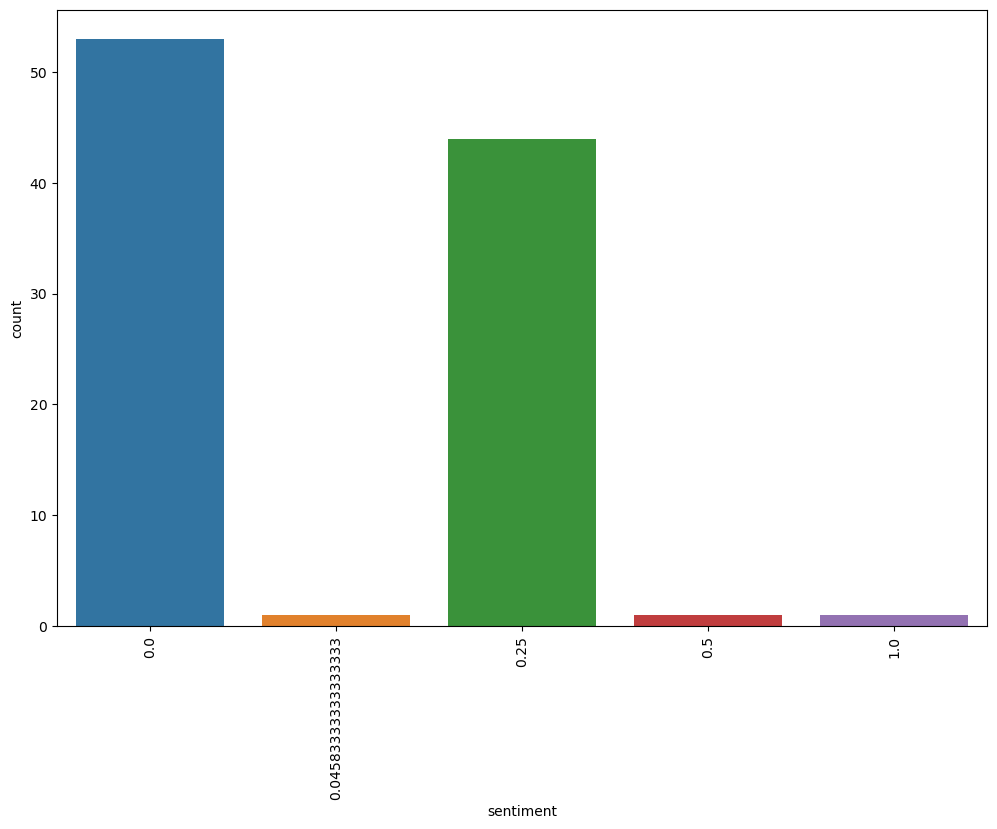

In [154]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x=df_msg_text["sentiment"])
plt.xticks(rotation=90);

In [179]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vect=CountVectorizer()
x=vect.fit_transform(df_msg_text['text'])

In [228]:
# 0 Nötr , 1 Pozitif , 2 Negative

def fnc_sentiment_groups(score):
    if score>0:
        return 1
##    elif score >= 0.01 and 0.5<=score :
##        return 2        
    else:
        return 0

In [229]:
df_msg_text['class']=df_msg_text['polarity'].apply(lambda x: fnc_sentiment_groups(x))

In [198]:
df_msg_text['class']=0

In [230]:
df_model=df_msg_text[['class','text']]

In [222]:
df_model.head()

,class,text
0,0,simancre haarp action turkey february earthq...
1,0,ajenglish thousands earthquake survivors made ...
2,0,video earthquakeconcept amp edit mei inspired ...
3,0,earthquake deprem strikes km se izmir turkey ...
4,0,simancre haarp action turkey february earthq...


In [223]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   100 non-null    int64 
 1   text    100 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [231]:
df_model["class"].value_counts()

0    53
1    47
Name: class, dtype: int64

In [232]:
x=df_model['text']
y=df_model['class']

# Classification Models

In [233]:
from pycaret.classification import*

In [234]:
exp_name=setup(data=df_model,target="class")

,Description,Value
0,Session id,1814
1,Target,class
2,Target type,Binary
3,Original data shape,"(100, 2)"
4,Transformed data shape,"(100, 17)"
5,Transformed train set shape,"(70, 17)"
6,Transformed test set shape,"(30, 17)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [235]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9714,0.9875,0.9417,1.0000,0.9657,0.9416,0.9480,0.5020
dt,Decision Tree Classifier,0.9714,0.9708,0.9417,1.0000,0.9657,0.9416,0.9480,0.0920
svm,SVM - Linear Kernel,0.9714,0.0000,0.9417,1.0000,0.9657,0.9416,0.9480,0.0910
ridge,Ridge Classifier,0.9714,0.0000,0.9417,1.0000,0.9657,0.9416,0.9480,0.0920
rf,Random Forest Classifier,0.9714,0.9875,0.9417,1.0000,0.9657,0.9416,0.9480,0.1660
ada,Ada Boost Classifier,0.9714,0.9708,0.9417,1.0000,0.9657,0.9416,0.9480,0.1170
gbc,Gradient Boosting Classifier,0.9714,0.9708,0.9417,1.0000,0.9657,0.9416,0.9480,0.1200
lda,Linear Discriminant Analysis,0.9714,0.9792,0.9417,1.0000,0.9657,0.9416,0.9480,0.0980
et,Extra Trees Classifier,0.9714,0.9875,0.9417,1.0000,0.9657,0.9416,0.9480,0.1860
xgboost,Extreme Gradient Boosting,0.9714,0.9833,0.9417,1.0000,0.9657,0.9416,0.9480,0.2170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

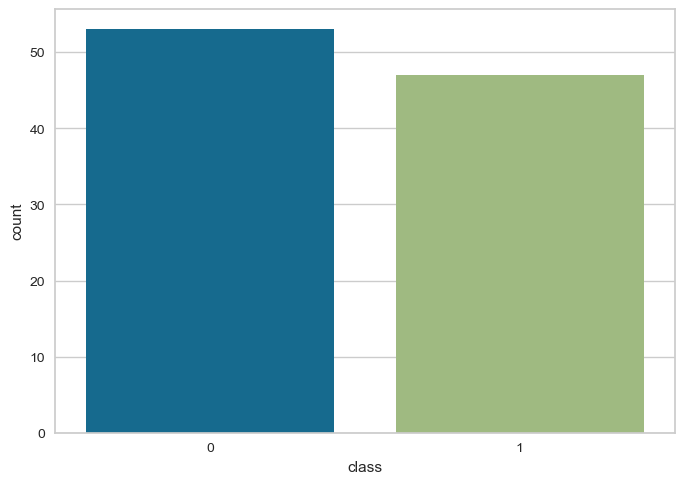

In [236]:
sns.countplot(x=df_msg_text['class']);

In [208]:
#vect=CountVectorizer(stop_words="english",ngram_range=(1,2),analyzer=fnc_lemma)

In [164]:
##Ekleri Kaldırıp kökleri Bulan Function,
#def fnc_lemma(text):
#  words=TextBlob(text).words
#  return [pr.stem(word) for word in words]

# WordCloud

In [175]:
#pip install wordcloud

In [176]:
from wordcloud import WordCloud 

In [177]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [217]:
##Konu Deprem Olunca Nötr yok , ya kötü ,ya iyi bence iyi de tarafıda zor.
possitive_data=df_msg_text[df_msg_text["subjectivity"]>0.5]["text"]
negative_data=df_msg_text[df_msg_text["subjectivity"]<0.5]["text"]
neutral_data=df_msg_text[df_msg_text["subjectivity"]==0.5]["text"]

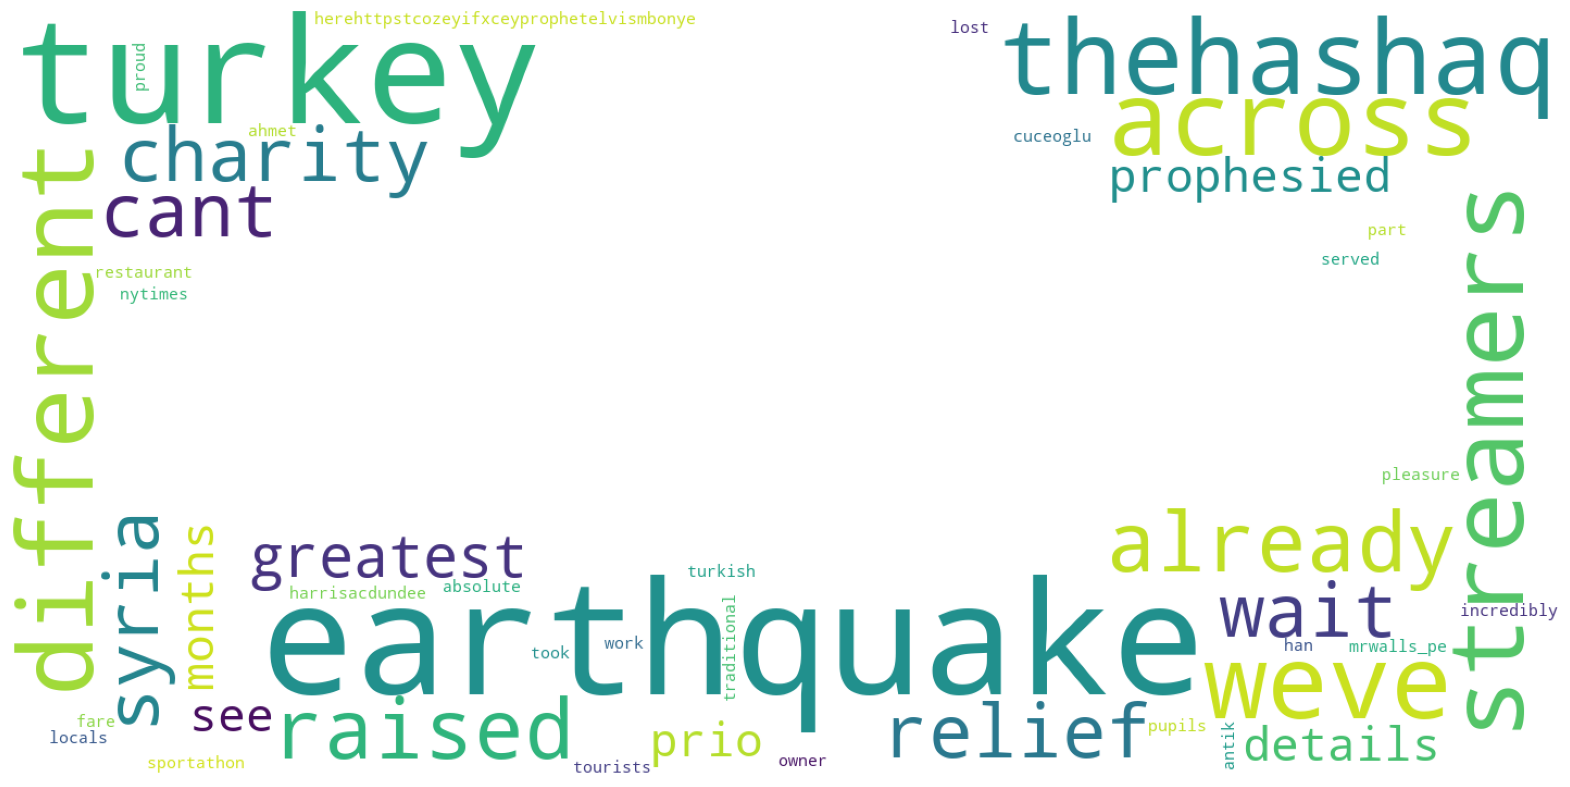

In [212]:
wc(possitive_data,"white")

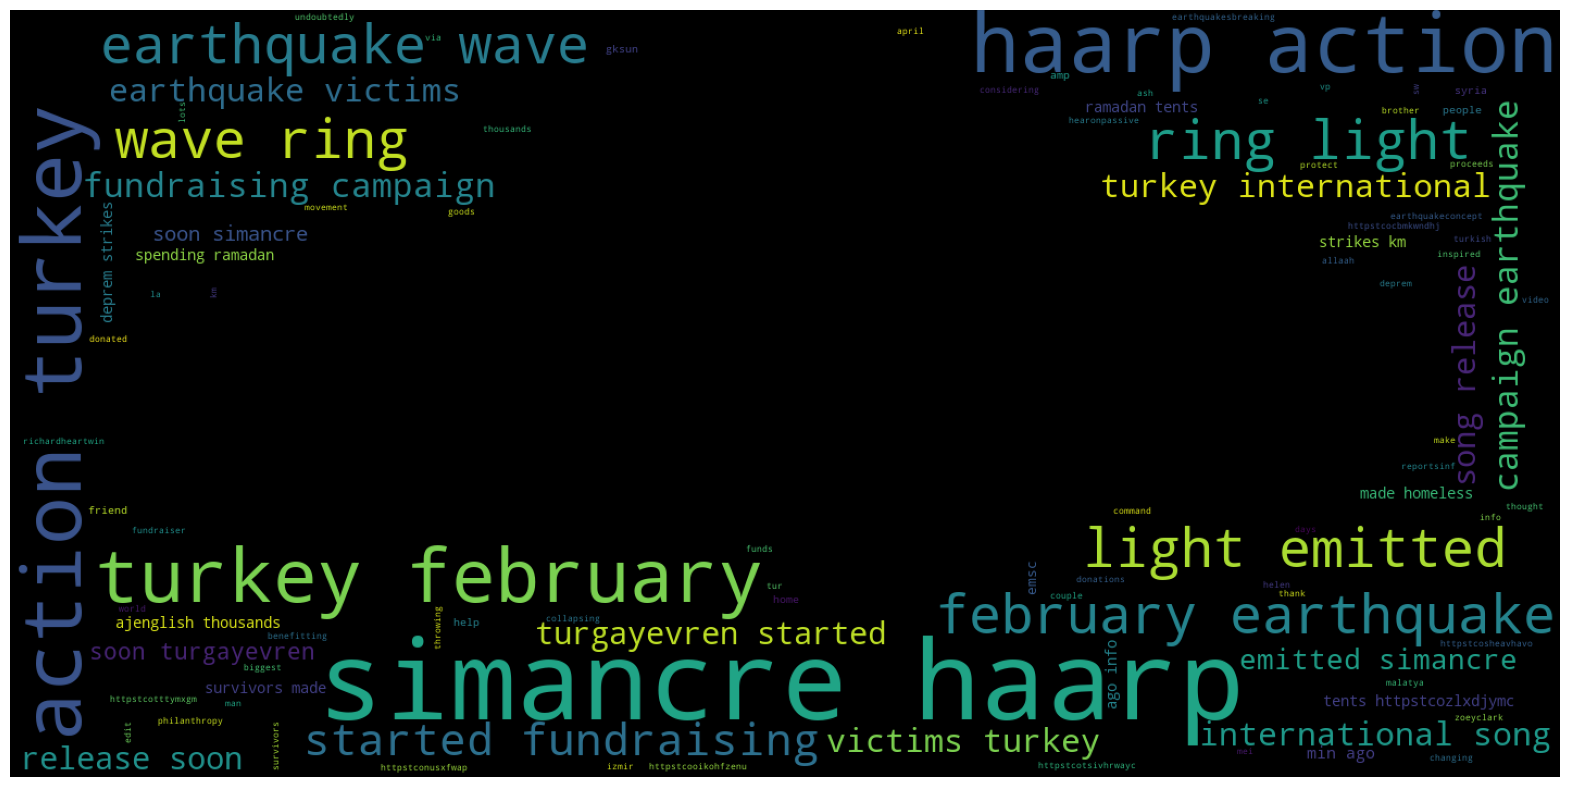

In [213]:
wc(negative_data,"black")

In [218]:
##wc(neutral_data,"red")